<a href="https://colab.research.google.com/github/AlbertoBassanoni/MLPNS_ABassanoni/blob/main/vis%5Cvisualization_exercise_ornstein_uhlenbeck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ornstein-Uhlenbeck Process:

Per questo piccolo esercizio di visualizzazione ho scelto di simulare un processo di Ornstein Uhlenbeck, un processo stocastico regolato dalla seguente equazione differenziale stocastica:

**$dX_t=\kappa (\theta - X_t) dt +\sigma dW_t$**

Dove:

- **$\kappa>0$** è un coefficiente di mean reversion;
- **$\theta$** è un termine di drift;
- **$\sigma$** è un coefficiente di volatilità; 

Il processo è Gaussiano, Markoviano e stazionario per tempi sufficientemente lunghi (è un decadimento esponenziale in cui è inserito un white noise regolato dal coefficiente di volatilità). 

L'equazione differenziale stocastica si può risolvere esattamente mediante la formula di Ito, e si ottiene il seguente risultato per il processo **$X_t$**:

**$X_t = \theta + (X_0 - \theta)e^{-\kappa t} + \int_0^t \sigma e^{\kappa (s-t)}dW_s$**

Essendo un processo di Ito, il processo di Ornstein-Uhlenbeck è una martingala, ed ha i seguenti momenti:

- Media **$E[X_t] = \theta + (X_0 - \theta)e^{-\kappa t}$**
- Covarianza **$Cov[X_s,X_t] = \frac{\sigma^2}{2\kappa}(e^{-\kappa|t-s|}-e^{-\kappa(s+t)})$**
- Varianza **$Var[X_t] = \frac{\sigma^2}{2\kappa}(1-e^{-2 \kappa t})$**

Dunque nel limite per **$t \rightarrow \infty$** ho che asintoticamente la media tende al valore **$\theta$** e la varianza tende al valore **$\frac{\sigma^2}{2\kappa}$**.


Numericamente si può discretizzare la SDE mediante il metodo di Eulero-Maruyama, e calcolare step by step il processo stocastico **$X_t$** definendo:

**$X_{n+1}=\theta + (X_n-\theta)e^{-\kappa \Delta t} + \sqrt{\frac{\sigma^2}{2\kappa}(1-e^{-2 \kappa \Delta t})}\epsilon_n$**

Dove **$X_n$** è il processo al tempo **$n$**, **$X_0$** è la condizione iniziale, **$\Delta t$** è lo step temporale e **$\epsilon_n \sim \mathcal{N}(0,1)$**.

In [7]:
import numpy as np
import scipy as scp
import scipy.stats as ss
import matplotlib.pyplot as plt

In [55]:
np.random.seed(seed=42) 

N = 20000         # time steps 
paths = 5000        # number of paths 
T = 6
T_vec, dt = np.linspace(0, T, N, retstep=True ) 

kappa = 3 
theta = 0.5 
sigma = 0.5     
std_asy = np.sqrt( sigma**2 /(2*kappa) )   # asymptotic standard deviation

X0 = 2
X = np.zeros((paths,N))
X[:,0] = X0
W = ss.norm.rvs( loc=0, scale=1, size=(paths,N-1) )


std_dt = np.sqrt( sigma**2 /(2*kappa) * (1-np.exp(-2*kappa*dt)) )
for t in range(0,N-1):
    X[:,t+1] = theta + np.exp(-kappa*dt)*(X[:,t]-theta) + std_dt * W[:,t]
    
X_T = X[:,-1]    # values of X at time T
X_1 = X[1,:]     # a single path

In [47]:
mean_T = theta + np.exp(-kappa*T) * (X0-theta) 
std_T = np.sqrt( sigma**2 /(2*kappa) * (1-np.exp(-2*kappa*T)) )

param = ss.norm.fit(X_T)   # FIT from data
print(f"Theoretical mean={mean_T.round(6)} and theoretical STD={std_T.round(6)}")
print("Parameters from the fit: mean={0:.6f}, STD={1:.6f}".format(*param) )

Theoretical mean=0.5 and theoretical STD=0.204124
Parameters from the fit: mean=0.499960, STD=0.204379


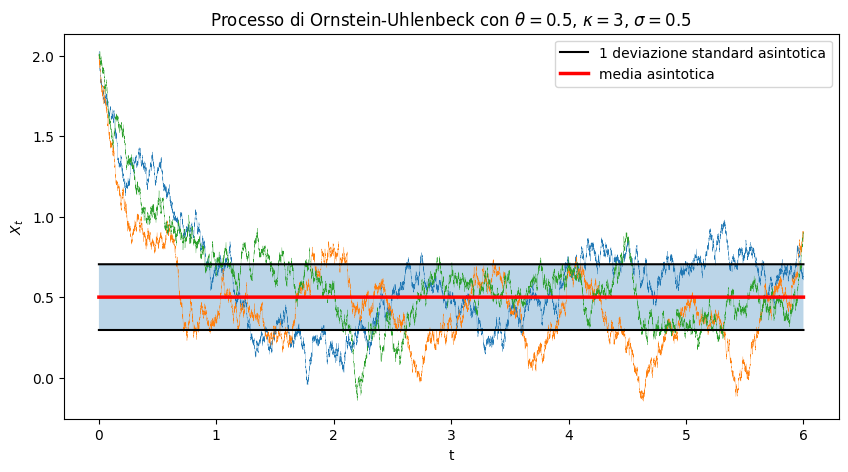

In [56]:
N_processes = 3   # number of processes
x = np.linspace(X_T.min(), X_T.max(), 100)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot();
ax1.plot(T_vec, X[:N_processes,:].T, linewidth=0.2)
ax1.plot(T_vec, (theta + std_asy)*np.ones_like(T_vec), label="1 deviazione standard asintotica", color="black" )
ax1.plot(T_vec, (theta - std_asy)*np.ones_like(T_vec), color="black" )
ax1.plot(T_vec, theta*np.ones_like(T_vec), label="media asintotica", linewidth=2.5, color="red")
ax1.fill_between(T_vec, (theta + std_asy)*np.ones_like(T_vec), (theta - std_asy)*np.ones_like(T_vec), alpha=0.3)
ax1.legend(loc="upper right"); ax1.set_title(f"Processo di Ornstein-Uhlenbeck con $\\theta=0.5$, $\kappa=3$, $\sigma=0.5$"); ax1.set_xlabel("t")
ax1.set_ylabel("$X_t$")
plt.show()

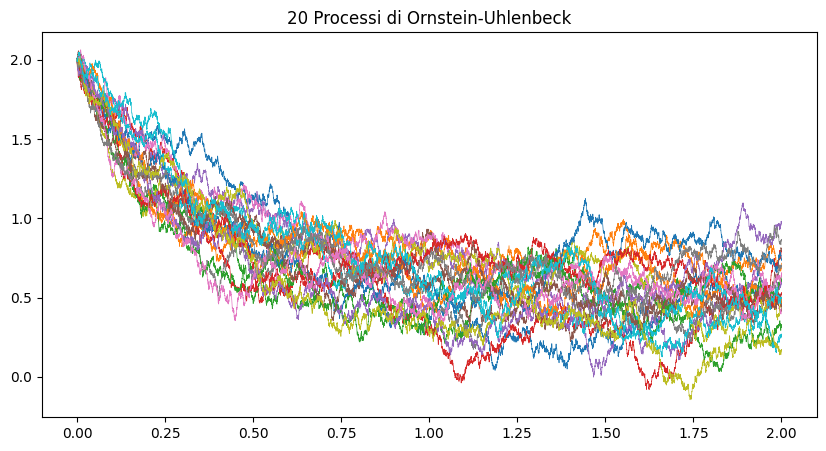

In [52]:
N_processes = 20   # number of processes
x = np.linspace(X_T.min(), X_T.max(), 100)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot();
ax1.plot(T_vec, X[:N_processes,:].T, linewidth=0.5)
ax1.set_title(f"{N_processes} Processi di Ornstein-Uhlenbeck");
plt.show()